# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

**Who:** Clinicians, people in the medical field can improve diagnostic accuracy and enable data-driven, patient-specific interventions.


**What:** The need for extensive breast cancer treatment based on tumor measurements can be predicted.


**How:** The Breast Cancer Wisconsin Dataset focuses on distinguishing between benign and malignant breast tumors.

# 3. Homework - work with your own data

In [73]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [56]:
!pip3 install -U ucimlrepo

In [57]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [58]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [59]:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [61]:
X.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [62]:
X.duplicated().any() # There are no duplicate rows in this dataset!

False

In [63]:
duplicates = {}

# Iterate through all columns and count duplicates in each
for column in X.columns:
    value_counts = X[column].value_counts()
    duplicates_in_column = value_counts[value_counts > 1]  # Values that appear more than once
    if not duplicates_in_column.empty:
        duplicates[column] = duplicates_in_column

print(duplicates)


{'radius1': radius1
12.340    4
11.710    3
12.460    3
13.050    3
10.260    3
         ..
12.870    2
12.880    2
10.480    2
19.400    2
9.742     2
Name: count, Length: 97, dtype: int64, 'texture1': texture1
20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
20.25    2
21.25    2
19.98    2
18.75    2
16.02    2
Name: count, Length: 81, dtype: int64, 'perimeter1': perimeter1
82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
120.20    2
107.10    2
79.19     2
114.20    2
58.79     2
71.49     2
70.79     2
73.34     2
97.26     2
87.21     2
74.72     2
85.98     2
123.70    2
137.80    2
129.10    2
113.40    2
81.35     2
94.25     2
88.73     2
133.80    2
61.49     2
70.67     2
88.37     2
78.83     2
78.29     2
67.49     2
109.30    2
117.40    2
152.10    2
87.32     2
130.70    2
81.25     2
84.08     2
132.90    2
102.40    2
102.50    2
132.40    2
130.00    2
103.70    2
Name: count, dtype: int64, 'area1': area1
512.2     3
1075.0    2
582.7    

In this case, there are duplicate values within several of the columns, however this is can be expected since we're looking at continuous measurements of various tumor characteristics. It would be inappropiate to have duplicate values when the values should represent unique identifiers like SSN, patient ID, email addresses...

In [64]:
X.mean()

,0
radius1,14.127292
texture1,19.289649
perimeter1,91.969033
area1,654.889104
smoothness1,0.096360
compactness1,0.104341
concavity1,0.088799
concave_points1,0.048919
symmetry1,0.181162
fractal_dimension1,0.062798


In [65]:
X.median()

,0
radius1,13.370000
texture1,18.840000
perimeter1,86.240000
area1,551.100000
smoothness1,0.095870
compactness1,0.092630
concavity1,0.061540
concave_points1,0.033500
symmetry1,0.179200
fractal_dimension1,0.061540


In [66]:
X.mode().iloc[0]

,0
radius1,12.340000
texture1,14.930000
perimeter1,82.610000
area1,512.200000
smoothness1,0.100700
compactness1,0.114700
concavity1,0.000000
concave_points1,0.000000
symmetry1,0.160100
fractal_dimension1,0.056670


In [67]:
X.isnull().sum().sum() # The are no missing values in the dataset!

0

In [68]:
# Check for unique values in the 'Diagnosis' column
print(y['Diagnosis'].unique())

['M' 'B']


In [69]:
# Check for columns that are identical
print(X.columns[X.nunique() == 1])  # Columns with only one unique value

Index([], dtype='object')


In [70]:
# Apply one-hot encoding to the 'Diagnosis' column
y_encoded = pd.get_dummies(y, columns=['Diagnosis'], drop_first=False)

print(y_encoded.head())

   Diagnosis_B  Diagnosis_M
0        False         True
1        False         True
2        False         True
3        False         True
4        False         True


One-hot encoding has been applied to "Diagnosis" (categorical column) in y, using pandas' get.dummies() function.



In [71]:
# Count the number of occurrences of each class in the 'Diagnosis' column
class_counts = y['Diagnosis'].value_counts()

print("Class Counts:")
print(class_counts)

Class Counts:
Diagnosis
B    357
M    212
Name: count, dtype: int64


**Conclusions**:
- Are the data usable?  Yes, it is!

- Do you need to modify or correct the data in some way? It doesn't seem like.

- Is there any class imbalance?  (Categories that have many more items than other categories). No!

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

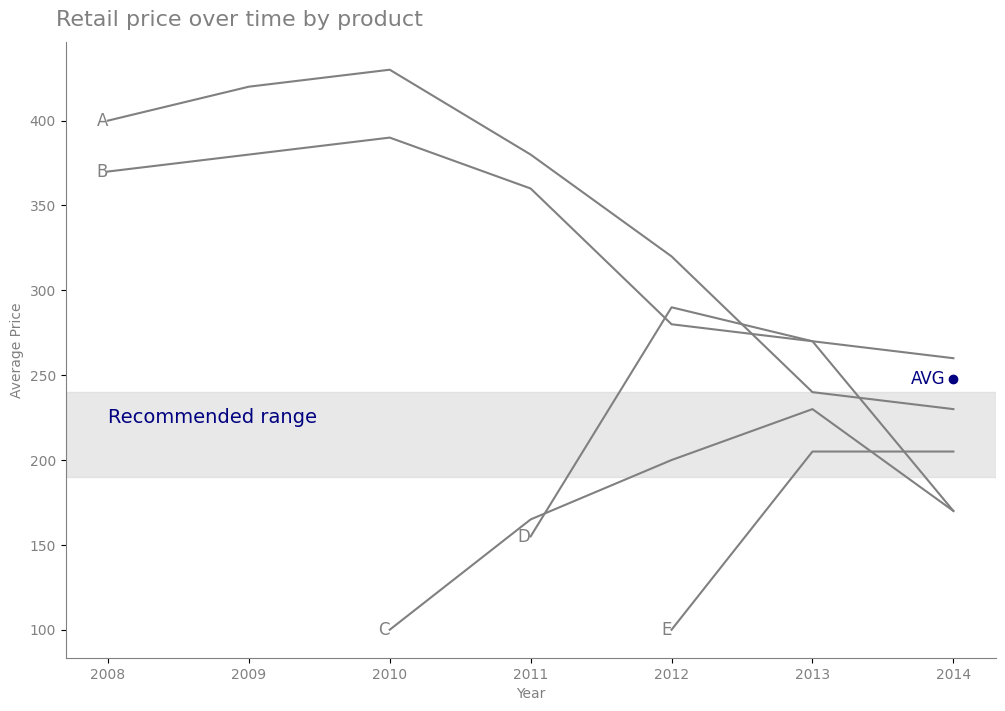

In [74]:
data = {
    'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014],
    'A': [400, 420, 430, 380, 320, 240, 230],
    'B': [370, 380, 390, 360, 280, 270, 260],
    'C': [None, None, 100, 165, 200, 230, 170],
    'D': [None, None, None, 155, 290, 270, 170],
    'E': [None, None, None, None, 100, 205, 205]
}

df = pd.DataFrame(data)

overall_avg = df.drop(columns=['Year']).mean().mean()

plt.figure(figsize=(12, 8))

for column in df.columns[1:]:  # Skip the 'Year' column, and plot the rest
    plt.plot(df['Year'], df[column], label=column, color='gray')

    # Find the first valid index for each column and place the label there
    first_valid_idx = df[column].first_valid_index()  # Index of first valid data point
    plt.text(df['Year'].iloc[first_valid_idx], df[column].iloc[first_valid_idx], column, color='gray',
             horizontalalignment='right', verticalalignment='center', fontsize=12)

# Plot the overall average
x_avg = df['Year'].iloc[len(df)-1]
plt.plot(x_avg, overall_avg, 'o', color='navy')

# Add 'AVG' label
plt.text(x_avg - 0.3, overall_avg, 'AVG', color='navy', verticalalignment='center', fontsize=12)

# Add shaded region for recommended range
plt.axhspan(190, 240, color='lightgray', alpha=0.5)

plt.text(df['Year'].iloc[0], 225, 'Recommended range', color='navy',
         verticalalignment='center', horizontalalignment='left', fontsize=14)

plt.xlabel('Year', color='gray')
plt.ylabel('Average Price', color='gray')

plt.figtext(
    0.27,  # X position
    0.90,  # Y position
    'Retail price over time by product',  # Text content
    ha='center',  # Horizontal alignment to center
    fontsize=16,
    color='gray',
)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')

plt.xticks(color='gray')
plt.yticks(color='gray')

plt.grid(False)
plt.show()


Documentation: https://www.geeksforgeeks.org/plot-multiple-lines-in-matplotlib/

# ChatGPT conversation 1

I'm using matplotlib. How can I make the lines of my line graph bold?
ChatGPT said:
ChatGPT
To make the lines of your line graph bold in Matplotlib, you can adjust the linewidth parameter when plotting the data. By increasing the linewidth value, you can make the lines thicker (i.e., bolder).

Here’s a quick example:

python
Copy
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

# Plot with bold lines (larger linewidth)
plt.plot(x, y, linewidth=3)  # Increase this number to make the line even bolder

plt.show()
In this example, linewidth=3 makes the line thicker. You can increase the number to make it even bolder if needed!


You said:
I would also like to insert an AVG data point
ChatGPT said:
ChatGPT
To insert an "average" data point on your line graph, you can calculate the average of your y values and then add a point at the corresponding x value. You can plot this average point using a different marker style or color to make it stand out.

Here’s how you can modify your code to include an average data point:

python
Copy
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

# Calculate the average of the y values
avg_y = np.mean(y)

# Plot the original line with bold lines
plt.plot(x, y, linewidth=3, label='Data')

# Plot the average data point as a red dot
plt.plot(np.mean(x), avg_y, 'ro', label=f'Average ({avg_y:.2f})')  # 'ro' = red circle marker

# Add title, labels, and legend
plt.title('Line Plot with Average Data Point')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

plt.show()
Breakdown:
avg_y = np.mean(y): This calculates the average of the y values.
plt.plot(np.mean(x), avg_y, 'ro'): This places a red dot ('ro') at the average y-value corresponding to the mean of the x-values.
The label f'Average ({avg_y:.2f})' will show the average value in the legend with two decimal places.
You can adjust the marker style or color if you want the average point to stand out more (e.g., change 'ro' to 'bs' for a blue square).


You said:
I have 5 columns, I need the overall average
ChatGPT said:
ChatGPT
Ah, I see! You want to calculate the overall average for the entire dataset, which likely includes multiple columns of data. If you have multiple columns and you want the average for all the values combined, you can flatten the data (if it's in a 2D structure) and then compute the overall average.

Here’s how to modify the code to calculate the overall average of the data from all 5 columns:

Example with 5 columns:
python
Copy
import matplotlib.pyplot as plt
import numpy as np

# Example data (5 columns, each with 5 rows)
x = [1, 2, 3, 4, 5]
y = [
    [1, 4, 9, 16, 25],  # y-values for the first series
    [2, 5, 10, 15, 20],  # y-values for the second series
    [3, 6, 12, 18, 24],  # y-values for the third series
    [4, 7, 14, 19, 30],  # y-values for the fourth series
    [5, 8, 13, 17, 26],  # y-values for the fifth series
]

# Convert the list of lists into a 2D numpy array and calculate the overall average
y_array = np.array(y)
overall_avg = np.mean(y_array)

# Plot the original data (lines for each series)
for series in y_array:
    plt.plot(x, series, linewidth=3)

# Plot the overall average data point as a red star
plt.plot(np.mean(x), overall_avg, 'r*', label=f'Overall Average ({overall_avg:.2f})')

# Add title, labels, and legend
plt.title('Line Plot with Overall Average')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

plt.show()
Explanation:
Data Structure: In this example, y is a list of lists (each list is a column, so you have 5 columns and 5 rows of data).
np.array(y): Converts the list of lists into a 2D numpy array to make it easier to manipulate.
np.mean(y_array): This calculates the overall average of all values in the array by flattening the 2D structure into 1D for averaging.
Plotting the Data: We plot each series in the y_array and then plot a red star marker at the overall average.
If you have different data structures or want a specific column-wise average, just let me know!
